In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_excel("/content/customer_churn_large_dataset.xlsx")

In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
df.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1


**Exploratory Data Analysis**

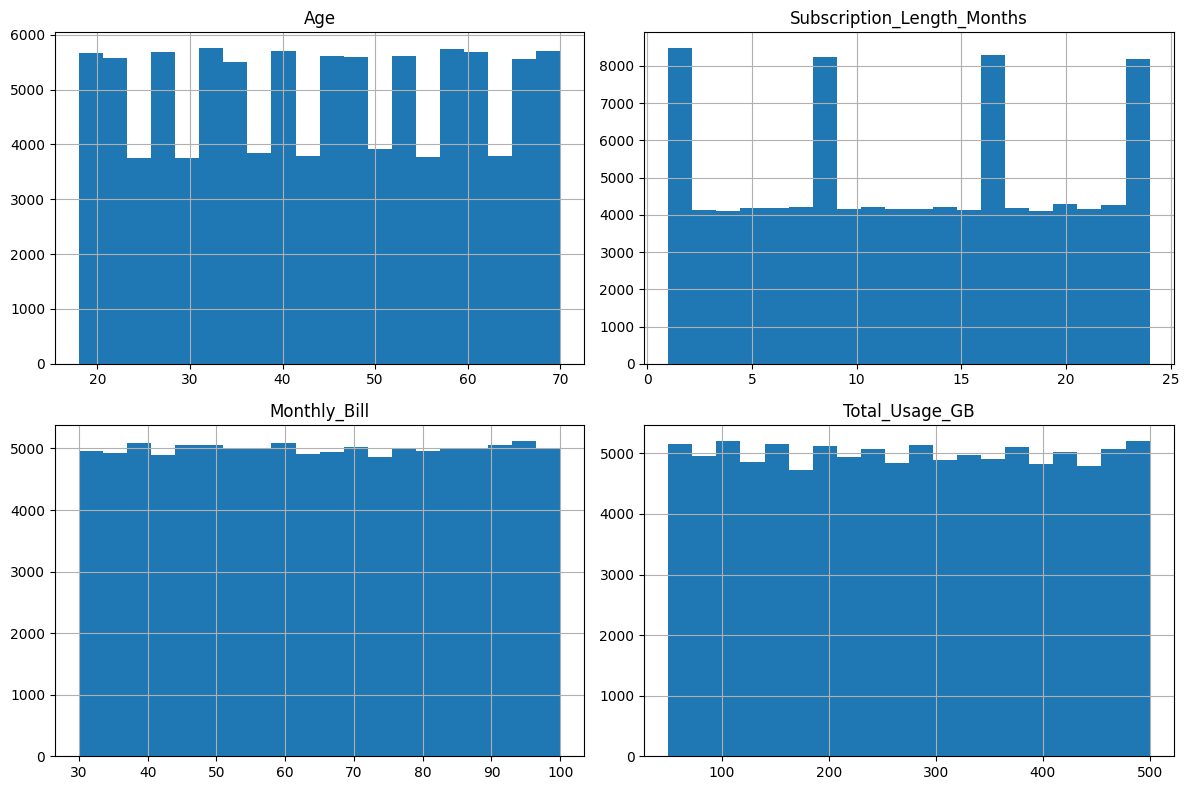

In [ ]:
# Plot histograms of numerical columns
numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
df[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

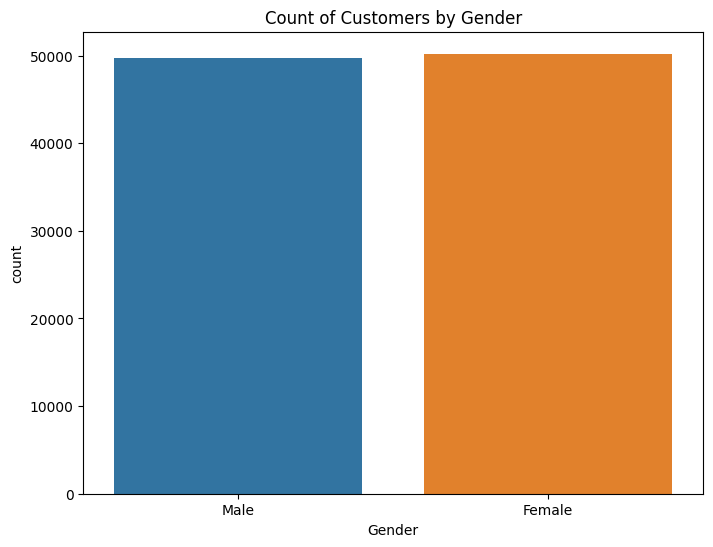

In [ ]:
#countplot shows the count of each category in a categorical variable.
# Plot count of customers by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Count of Customers by Gender')
plt.show()

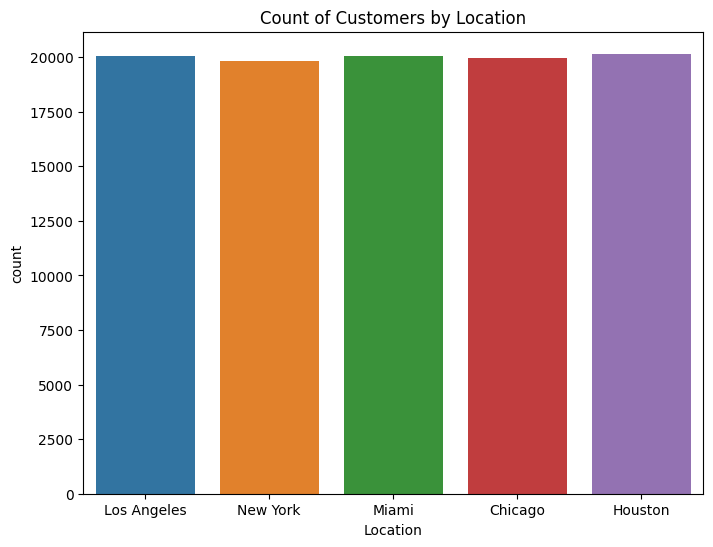

In [ ]:
#countplot shows the count of each category in a categorical variable.
# Plot count of customers by Location
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Location')
plt.title('Count of Customers by Location')
plt.show()

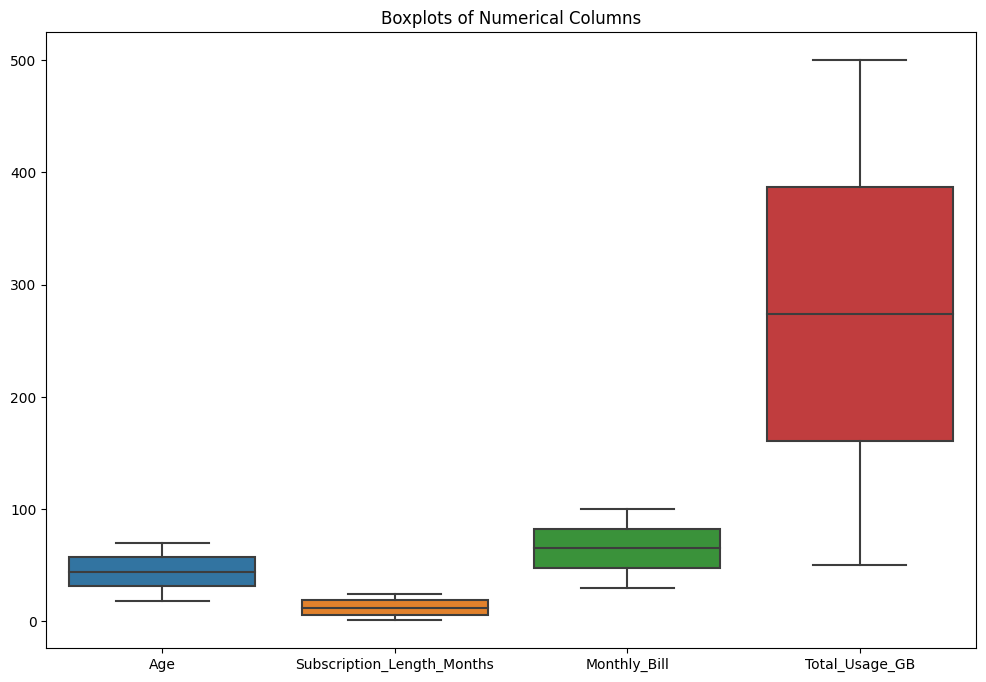

In [ ]:
#Boxplots visualize the distribution of a numerical variable and display
#statistical information like median, quartiles, and potential outliers.
#Plot boxplots of numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplots of Numerical Columns')
plt.show()

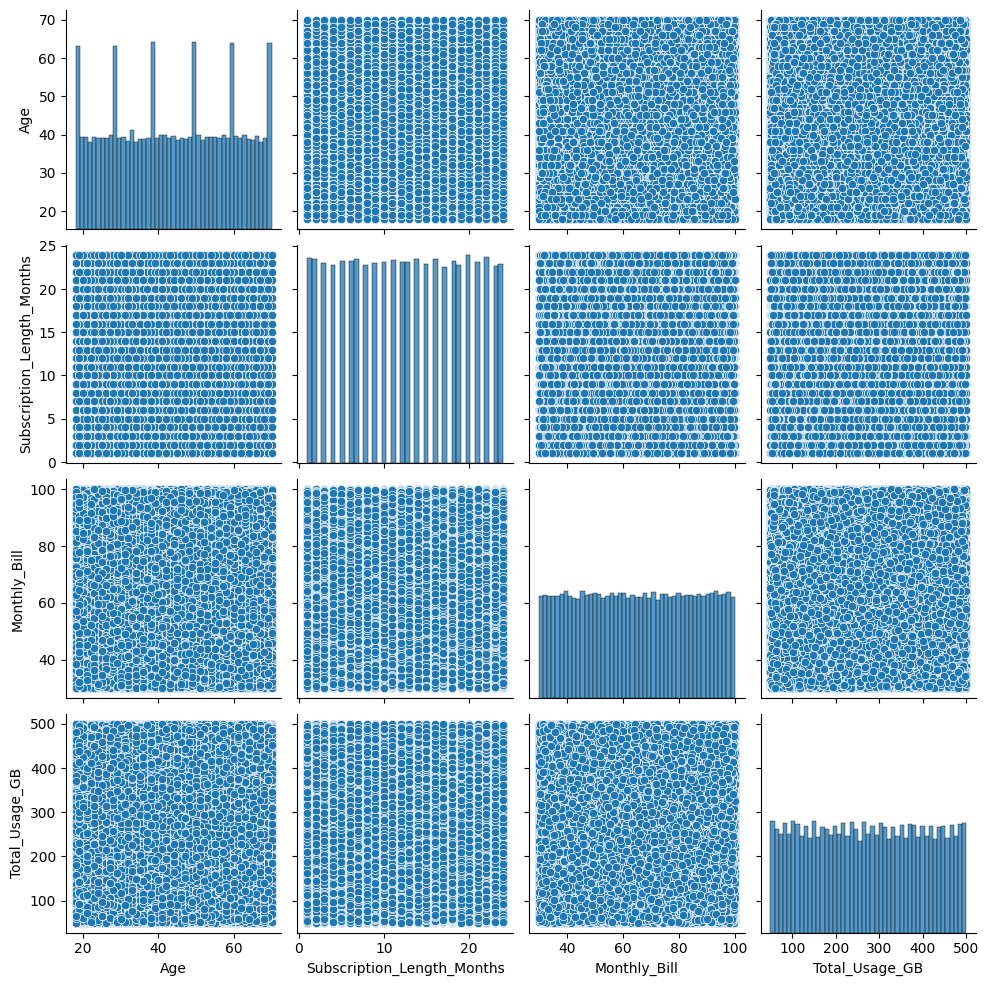

In [ ]:
# Plot pairplot of numerical columns
sns.pairplot(data=df[numerical_columns])
plt.show()

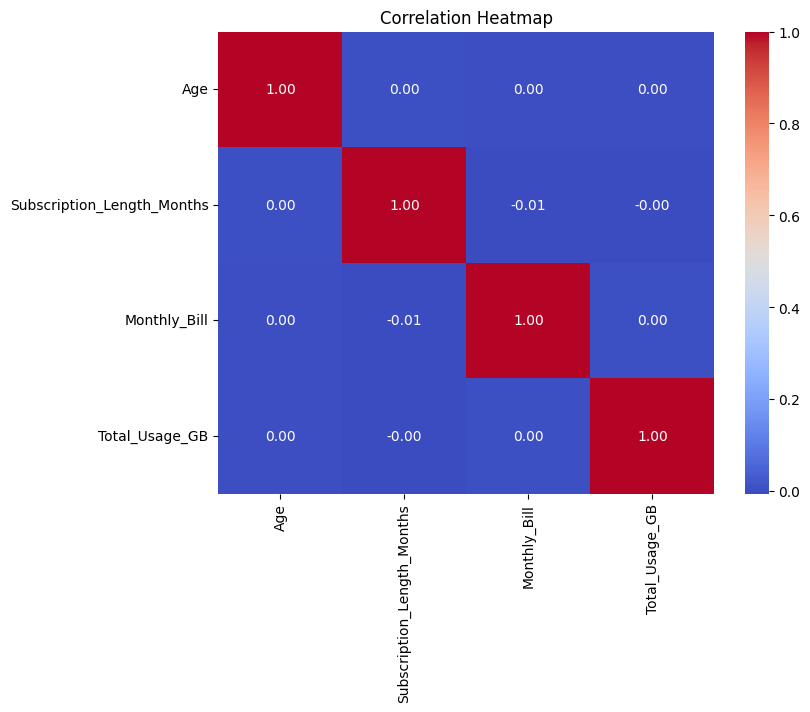

In [ ]:
#Correllation heatmap
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
# Removing variables that will not affect the dependent variable
df.drop(columns = ['CustomerID','Name'],axis = 1,inplace = True)

*By conducting a thorough analysis of this dataset, I've determined that its structure is such that there is no discernible correlation between any of the columns. Additionally, the distributions are consistently uniform, indicating that each column holds comparable significance in the process of building a model.*

In [ ]:
#SPLITTING THE DATA INTO DEPENDENT AND IDENPENDENT VARIABLES
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
#SPLITTING THE DATA INTO TRAINING AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80000, 6), (20000, 6), (80000,), (20000,))

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
# DEFINING COLUMNS FOR ENCODING AND STANDARDIZATION
categorical_columns = ['Gender','Location']
numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
# INITIALIZING PREPROCESSING TRANSFORMERS
ohe = OneHotEncoder(drop='first')  # Use 'drop' to avoid multicollinearity
sc = StandardScaler()
# CREATING COLUMN TRANSFORMER
ct = ColumnTransformer(
    transformers=[
        ('encode_location_gender', ohe, categorical_columns),
        ('standardization', sc, numerical_columns)
    ],
    remainder='passthrough'
)
ct=make_pipeline(ct)

In [ ]:
# APPLY LABEL ENCODING TO TARGET VARIABLE
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
#1 LOGISTIC REGRESSION
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
logreg = Pipeline(steps=[
    ('preprocessing', ct),
    ('classifier', LogisticRegression())
])

In [ ]:
from sklearn.metrics import classification_report

models = [
    ('Logistic Regression', logreg),
]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = model.score(X_test, y_test)

    # Calculate precision, recall, and F1-score
    classification_rep = classification_report(y_test, y_pred)

    print(f"Metrics for {name}:\n")
    print(f"Accuracy: {accuracy}\n")
    print(f"Classification Report:\n{classification_rep}\n")


Metrics for Logistic Regression:

Accuracy: 0.5037

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.63      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000




In [ ]:
#2 RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc = Pipeline(steps=[
    ('preprocessing',ct),
    ('classifier', RandomForestClassifier())
])

In [ ]:
from sklearn.metrics import classification_report

models = [
    ('RANDOM FOREST', rfc),
]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = model.score(X_test, y_test)

    # Calculate precision, recall, and F1-score
    classification_rep = classification_report(y_test, y_pred)

    print(f"Metrics for {name}:\n")
    print(f"Accuracy: {accuracy}\n")
    print(f"Classification Report:\n{classification_rep}\n")


Metrics for RANDOM FOREST:

Accuracy: 0.49795

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     10079
           1       0.49      0.48      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000




In [ ]:
from sklearn.naive_bayes import GaussianNB
nb= Pipeline(steps=[
    ('preprocessing',ct),
    ('classifier', GaussianNB())
])

In [ ]:
from sklearn.metrics import classification_report

models = [
    ('NAIVE BAYES', nb),
]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = model.score(X_test, y_test)

    # Calculate precision, recall, and F1-score
    classification_rep = classification_report(y_test, y_pred)

    print(f"Metrics for {name}:\n")
    print(f"Accuracy: {accuracy}\n")
    print(f"Classification Report:\n{classification_rep}\n")


Metrics for NAIVE BAYES:

Accuracy: 0.50575

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.58      0.54     10079
           1       0.50      0.43      0.47      9921

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.50     20000
weighted avg       0.51      0.51      0.50     20000




*The basic machine learning method didn't produce strong results, which makes sense because the features don't seem to have clear relationships.*

**NEURAL NETWORK**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Create `Features` & `Targets`
features = ct.fit_transform(X_train)
targets = y_train

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = keras.Sequential(layers=[
    keras.layers.Dense(units=64, activation="relu", input_shape=(features.shape[1], )),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=32, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=16, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=8, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Check brief summary of model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                640       
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 128)               8320      
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 32)               

In [ ]:
# Finally time to train the model
model.fit(x=features, y=targets, batch_size=1000, epochs=60, validation_split=0.2)

Epoch 1/60
64/64 [==============================] - 2s 14ms/step - loss: 0.6934 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5032
Epoch 2/60
64/64 [==============================] - 1s 11ms/step - loss: 0.6934 - accuracy: 0.4956 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 3/60
64/64 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4952
Epoch 4/60
64/64 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4953
Epoch 5/60
64/64 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 6/60
64/64 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 7/60
64/64 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 8/60
64

In [ ]:
test_features = ct.transform(X_test)
test_targets = y_test
model.evaluate(test_features, test_targets)

625/625 [==============================] - 2s 3ms/step - loss: 0.6933 - accuracy: 0.5038


[0.6932849884033203, 0.5037999749183655]

In [ ]:
# Deploy the model using `pickle` module
import pickle
# Save the trained model using pickle
with open("naive_bayes_model.pkl", "wb") as model_file:
    pickle.dump(nb, model_file)